In [1]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
pred_pkls_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/test_slurm2'
pred_pkls_path = Path(pred_pkls_path)

In [4]:
pred_pkls_files = sorted(pred_pkls_path.rglob('pythia*_pred.pkl'))

In [6]:
sample = []
for pred_pkls_file in pred_pkls_files:
    sample_pd = joblib.load(pred_pkls_file)
    sample_pd = sample_pd[(sample_pd["jet_nTracks"] > 1) & (sample_pd["target"] != '-')] 

    sample.append(sample_pd.sample(frac = 0.3))

In [8]:
sample = pd.concat(sample)

In [9]:
sample.shape

(61740598, 21)

In [22]:
sample.drop(columns=sample.columns[-7:], inplace=True)

In [129]:
sample = sample[sample['event_weight'] < 50]

In [130]:
import hist
from hist import Hist

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1554750d0d60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

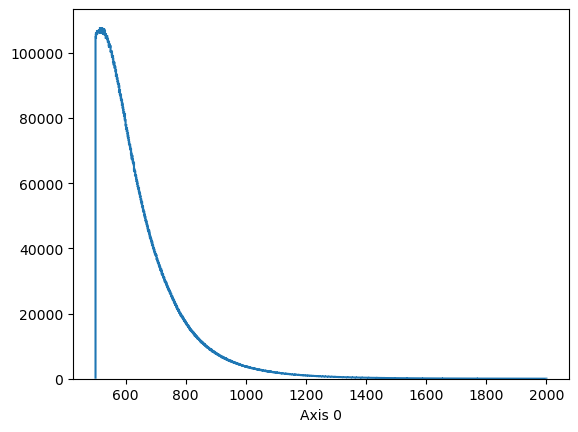

In [131]:
pt_hist =Hist(hist.axis.Regular(bins=1500, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist.fill(sample['jet_pt'], weight=sample['event_weight'])
pt_hist.plot()

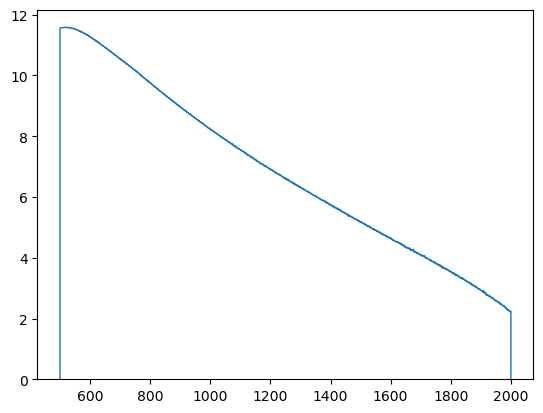

In [132]:
plt.stairs(np.log(pt_hist.values()), np.linspace(500,2000,1501))

In [133]:
flatpt_factor = 1.0 / pt_hist.values()

In [134]:
pt_idx = np.digitize(sample['jet_pt'], bins=np.linspace(500,2000,1501)) - 1

In [135]:
sample['flatpt_weight'] = sample['event_weight'] * flatpt_factor[pt_idx]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x155474daf9a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

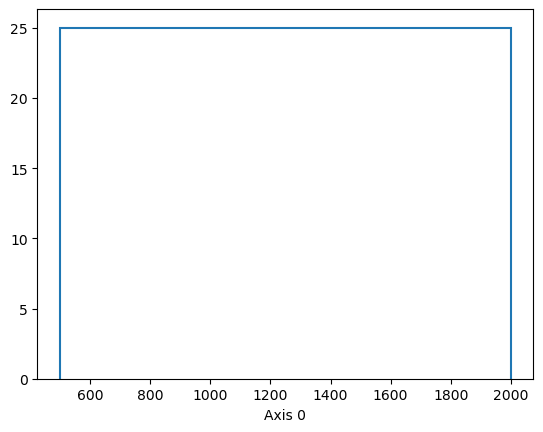

In [136]:
pt_hist_flat_pt =Hist(hist.axis.Regular(bins=60, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt.fill(sample['jet_pt'], weight=sample['flatpt_weight'])
pt_hist_flat_pt.plot()

In [137]:
pt_hist_flat_pt

Hist(Regular(60, 500, 2000, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=1500, variance=0.113071)

In [138]:
sample.describe()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,is_forward,is_leading,pt_idx,flatpt_weight
count,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,6.174060e+07,61740596.0,6.174060e+07,6.174060e+07
mean,3.647049e+05,6.938186e+07,9.420377e+02,-6.248352e-04,2.139941e+01,5.009340e-02,2.040143e-01,-2.294802e-02,9.901265e+00,3.308138e-01,5.000033e-01,0.5,2.024653e+00,2.429520e-05
std,9.396707e-01,8.285301e+07,3.870897e+02,8.666120e-01,1.010141e+01,4.166537e-02,6.661953e-02,2.504012e-01,9.448156e+00,5.107068e-01,5.000000e-01,0.5,1.655815e+00,3.522968e-05
min,3.647030e+05,2.000000e+00,5.000000e+02,-2.099999e+00,2.000000e+00,7.625178e-05,3.141784e-07,-8.056147e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,3.647040e+05,1.081901e+07,6.329164e+02,-6.335645e-01,1.400000e+01,1.982217e-02,1.607466e-01,-1.952041e-01,2.000000e+00,2.294642e-02,0.000000e+00,0.0,1.000000e+00,6.607983e-06
50%,3.647050e+05,3.308725e+07,8.017252e+02,-2.487468e-03,2.000000e+01,3.580529e-02,2.093405e-01,3.706356e-03,2.000000e+00,1.801149e-01,1.000000e+00,0.0,2.000000e+00,1.179145e-05
75%,3.647060e+05,1.048238e+08,1.196459e+03,6.326021e-01,2.700000e+01,6.724965e-02,2.529604e-01,1.728712e-01,2.100000e+01,4.260374e-01,1.000000e+00,1.0,3.000000e+00,2.885429e-05
max,3.647090e+05,2.930030e+08,2.000000e+03,2.100000e+00,1.180000e+02,4.074240e-01,3.884171e-01,6.251534e-01,2.100000e+01,4.540636e+01,1.000000e+00,1.0,5.000000e+00,4.693307e-02


In [11]:
sample.to_pickle("training_sample.pkl")

In [2]:
sample = pd.read_pickle('training_sample.pkl')

In [4]:
sample['flatpt_weight']

38784     0.000016
76944     0.000097
184802    0.000010
286675    0.000004
99196     0.000011
            ...   
267768    0.000008
299310    0.000008
212162    0.000014
367160    0.000014
350798    0.000025
Name: flatpt_weight, Length: 61740596, dtype: float64

In [10]:
sample['target'] = sample['target'].astype(float)